### EDA

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the data
df = pd.read_csv('data/raw/bank-marketing-campaign-data.csv', sep=';')
df = df.dropna()

In [33]:
print(df.shape)

(41188, 21)


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

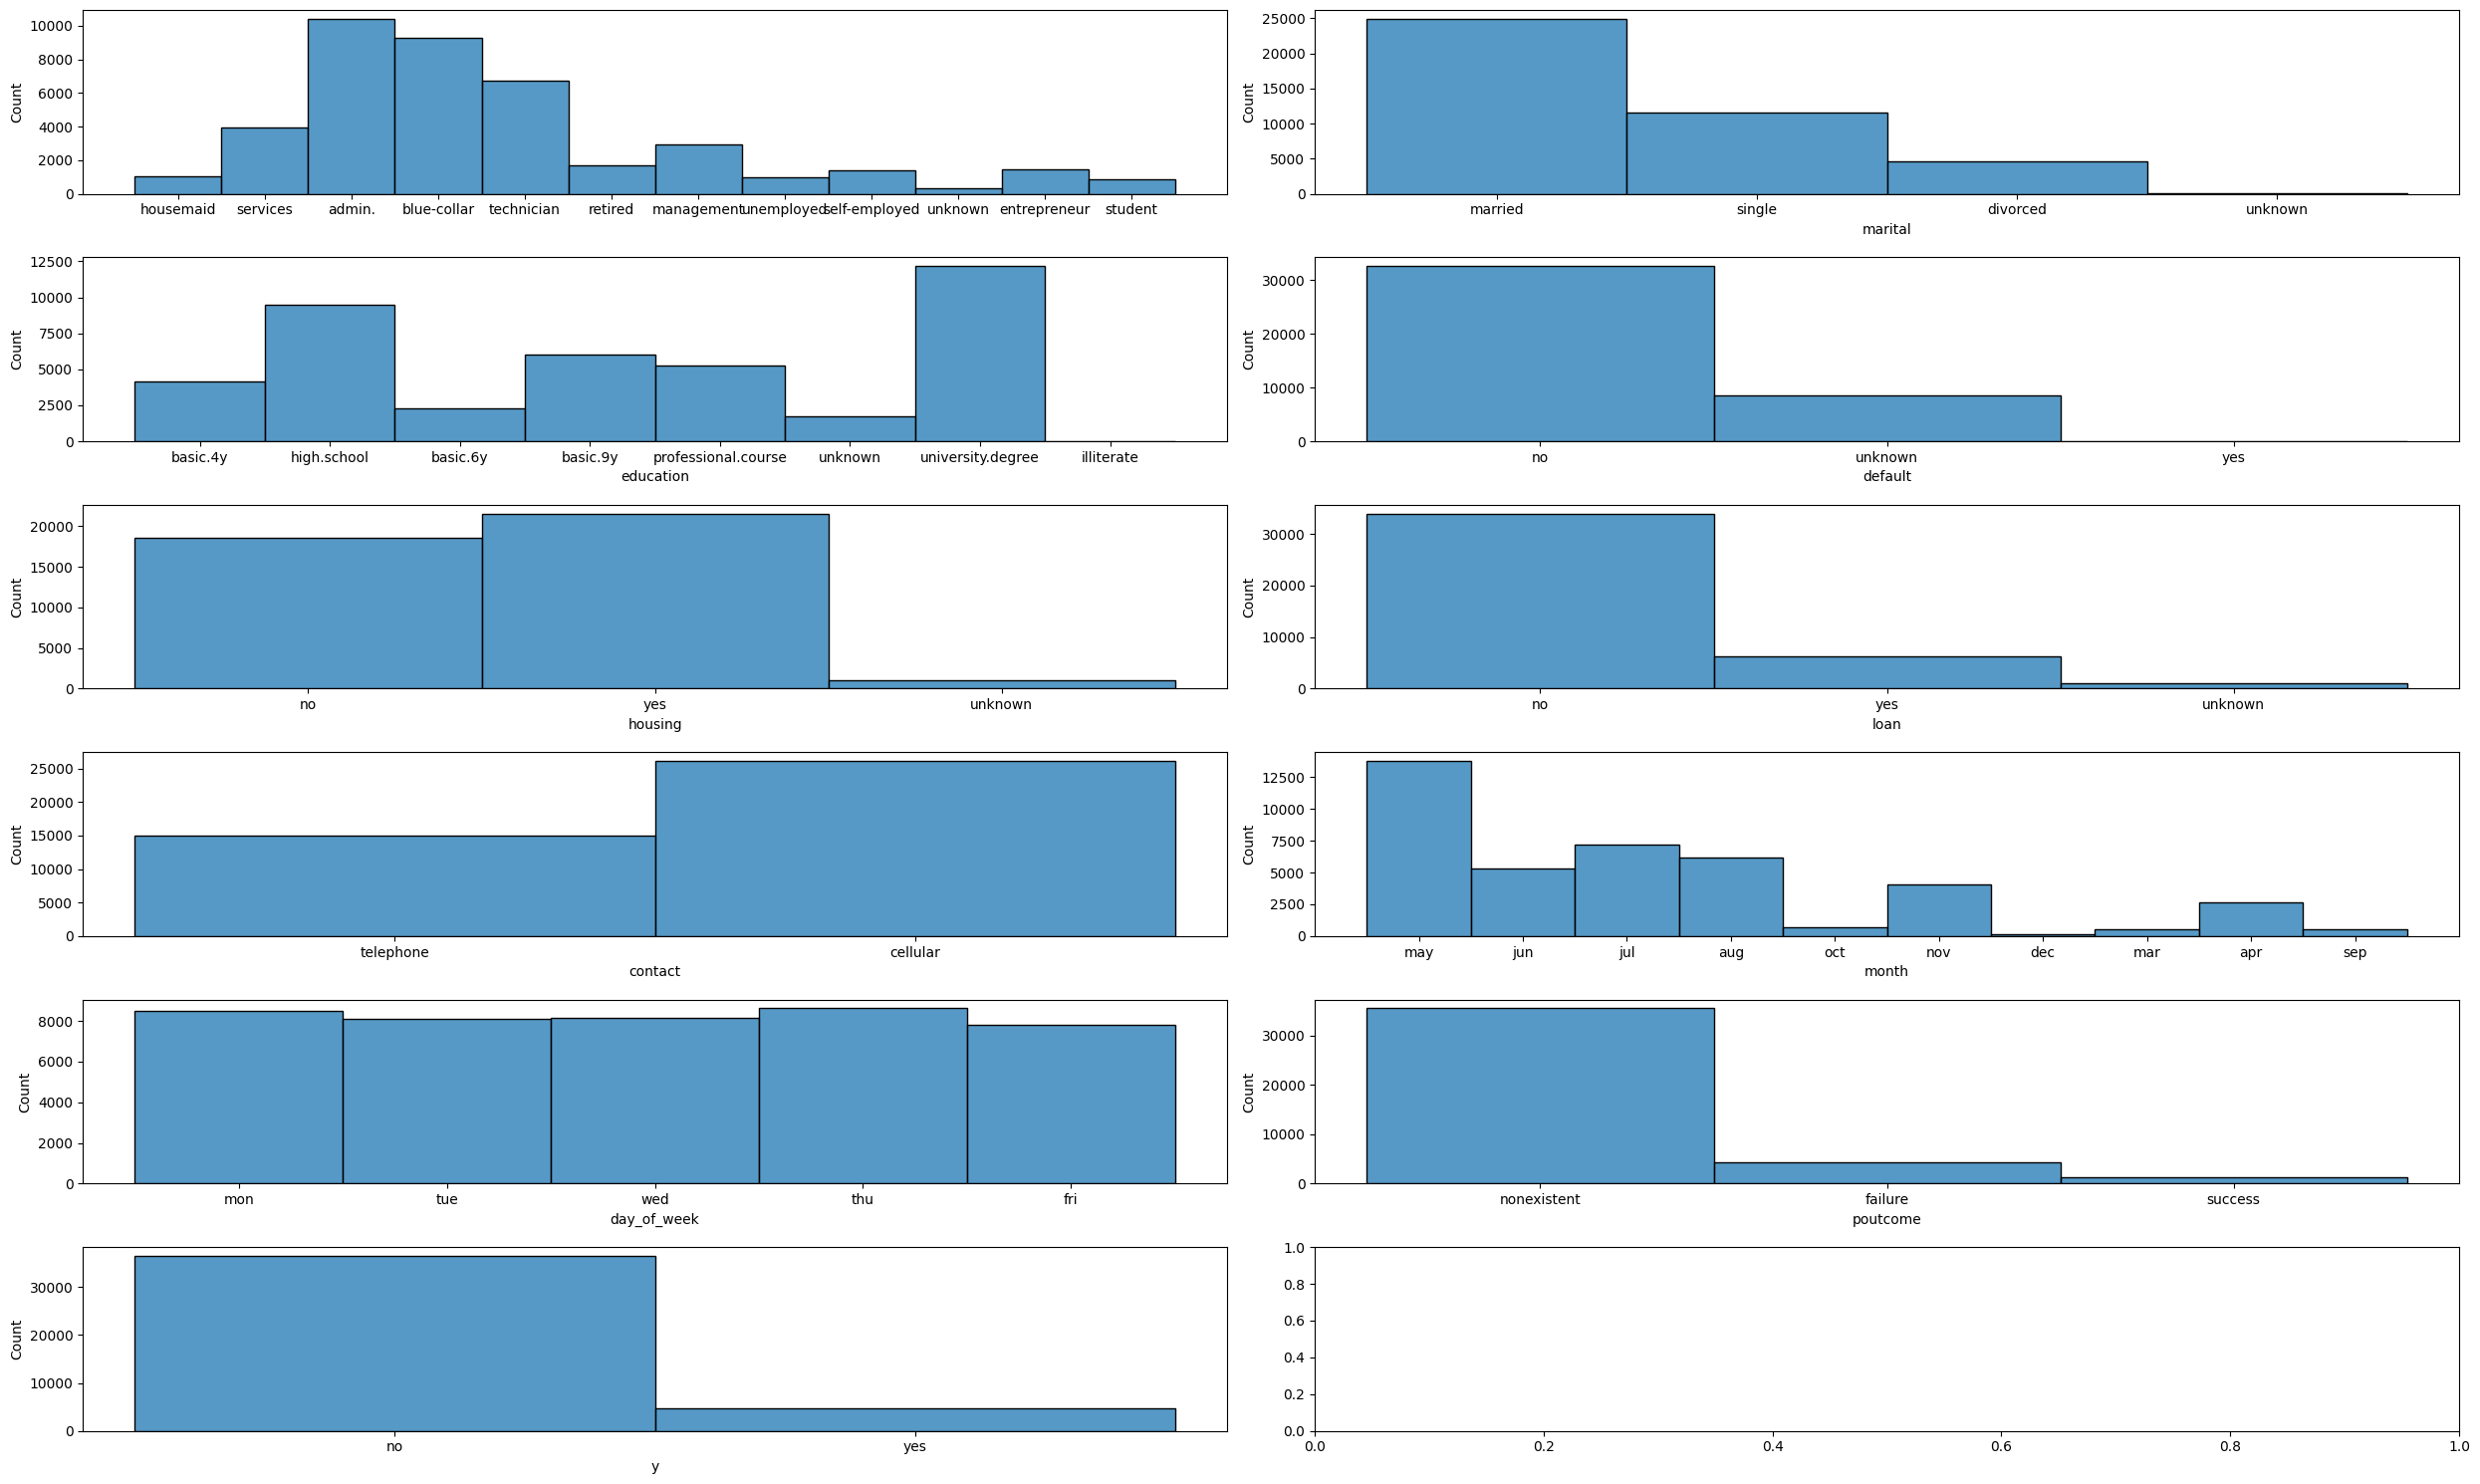

In [35]:
##CATEGORICAL VARIABLES##

fig, axis = plt.subplots(6, 2, figsize = (25, 15))

# Create a multiple histogram
sns.histplot(ax = axis[0, 0], data = df, x = "job").set(xlabel = None)
sns.histplot(ax = axis[0, 1], data = df, x = "marital")#.set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = df, x = "education")#.set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = df, x = "default")
sns.histplot(ax = axis[2, 0], data = df, x = "housing")#.set(ylabel = None)
sns.histplot(ax = axis[2, 1], data = df, x = "loan")#.set(ylabel = None)
sns.histplot(ax = axis[3, 0], data = df, x = "contact")#.set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = df, x = "month")#.set(ylabel = None)
sns.histplot(ax = axis[4, 0], data = df, x = "day_of_week")#.set(ylabel = None)
sns.histplot(ax = axis[4, 1], data = df, x = "poutcome")
sns.histplot(ax = axis[5, 0], data = df, x = "y")#.set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

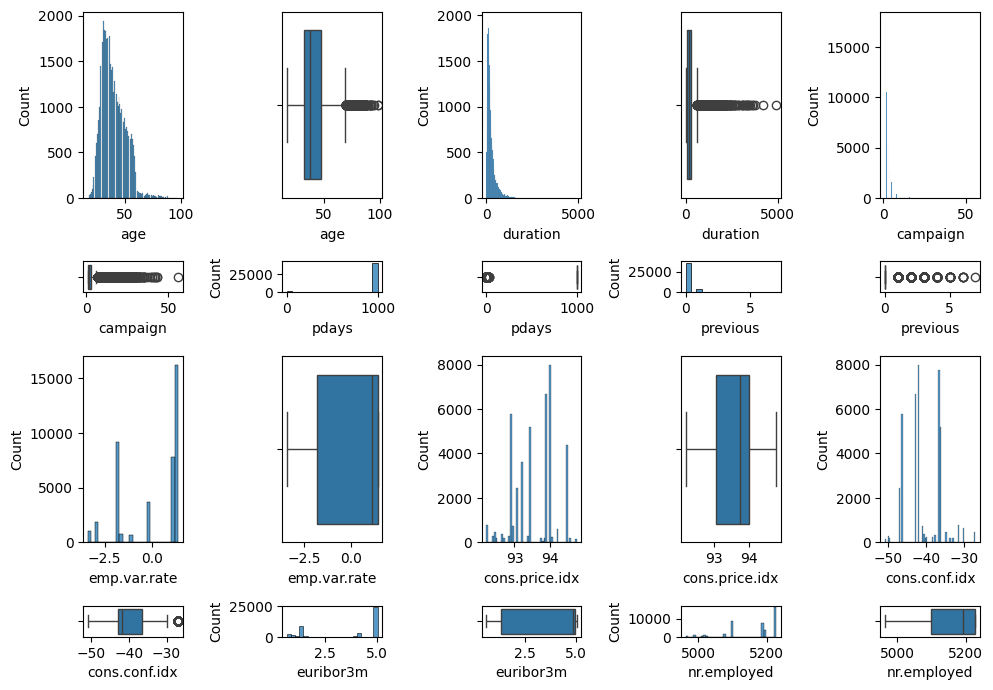

In [36]:
##NUMERIC VARIABLES##

fig, axis = plt.subplots(4, 5, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = df, x = "age")#.set(xlabel = None)
sns.boxplot(ax = axis[0, 1], data = df, x = "age")
sns.histplot(ax = axis[0, 2], data = df, x = "duration")#.set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[0, 3], data = df, x = "duration")
sns.histplot(ax = axis[0, 4], data = df, x = "campaign")#.set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "campaign")
sns.histplot(ax = axis[1, 1], data = df, x = "pdays")#.set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "pdays")
sns.histplot(ax = axis[1, 3], data = df, x = "previous")#.set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 4], data = df, x = "previous")
sns.histplot(ax = axis[2, 0], data = df, x = "emp.var.rate")#.set(xlabel = None)
sns.boxplot(ax = axis[2, 1], data = df, x = "emp.var.rate")
sns.histplot(ax = axis[2, 2], data = df, x = "cons.price.idx")#.set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[2, 3], data = df, x = "cons.price.idx")
sns.histplot(ax = axis[2, 4], data = df, x = "cons.conf.idx")#.set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "cons.conf.idx")
sns.histplot(ax = axis[3, 1], data = df, x = "euribor3m")#.set(xlabel = None)
sns.boxplot(ax = axis[3, 2], data = df, x = "euribor3m")
sns.histplot(ax = axis[3, 3], data = df, x = "nr.employed")#.set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 4], data = df, x = "nr.employed")


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

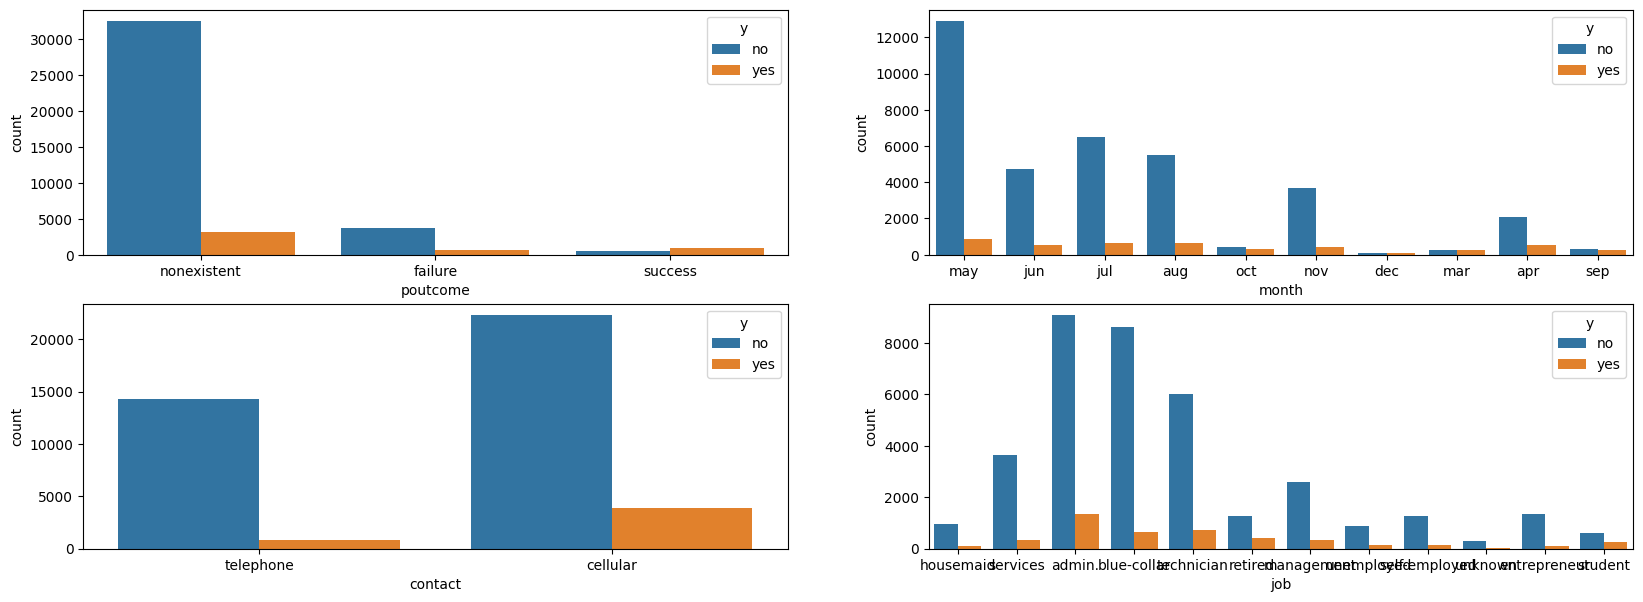

In [37]:

fig, axis = plt.subplots(2, 2, figsize = (20, 7))

sns.countplot(ax = axis[0, 0], data = df, x = "poutcome", hue = "y")
sns.countplot(ax = axis[0, 1], data = df, x = "month", hue = "y")
sns.countplot(ax = axis[1, 0], data = df, x = "contact", hue = "y")
sns.countplot(ax = axis[1, 1], data = df, x = "job", hue = "y")

# Show the plot
plt.show()

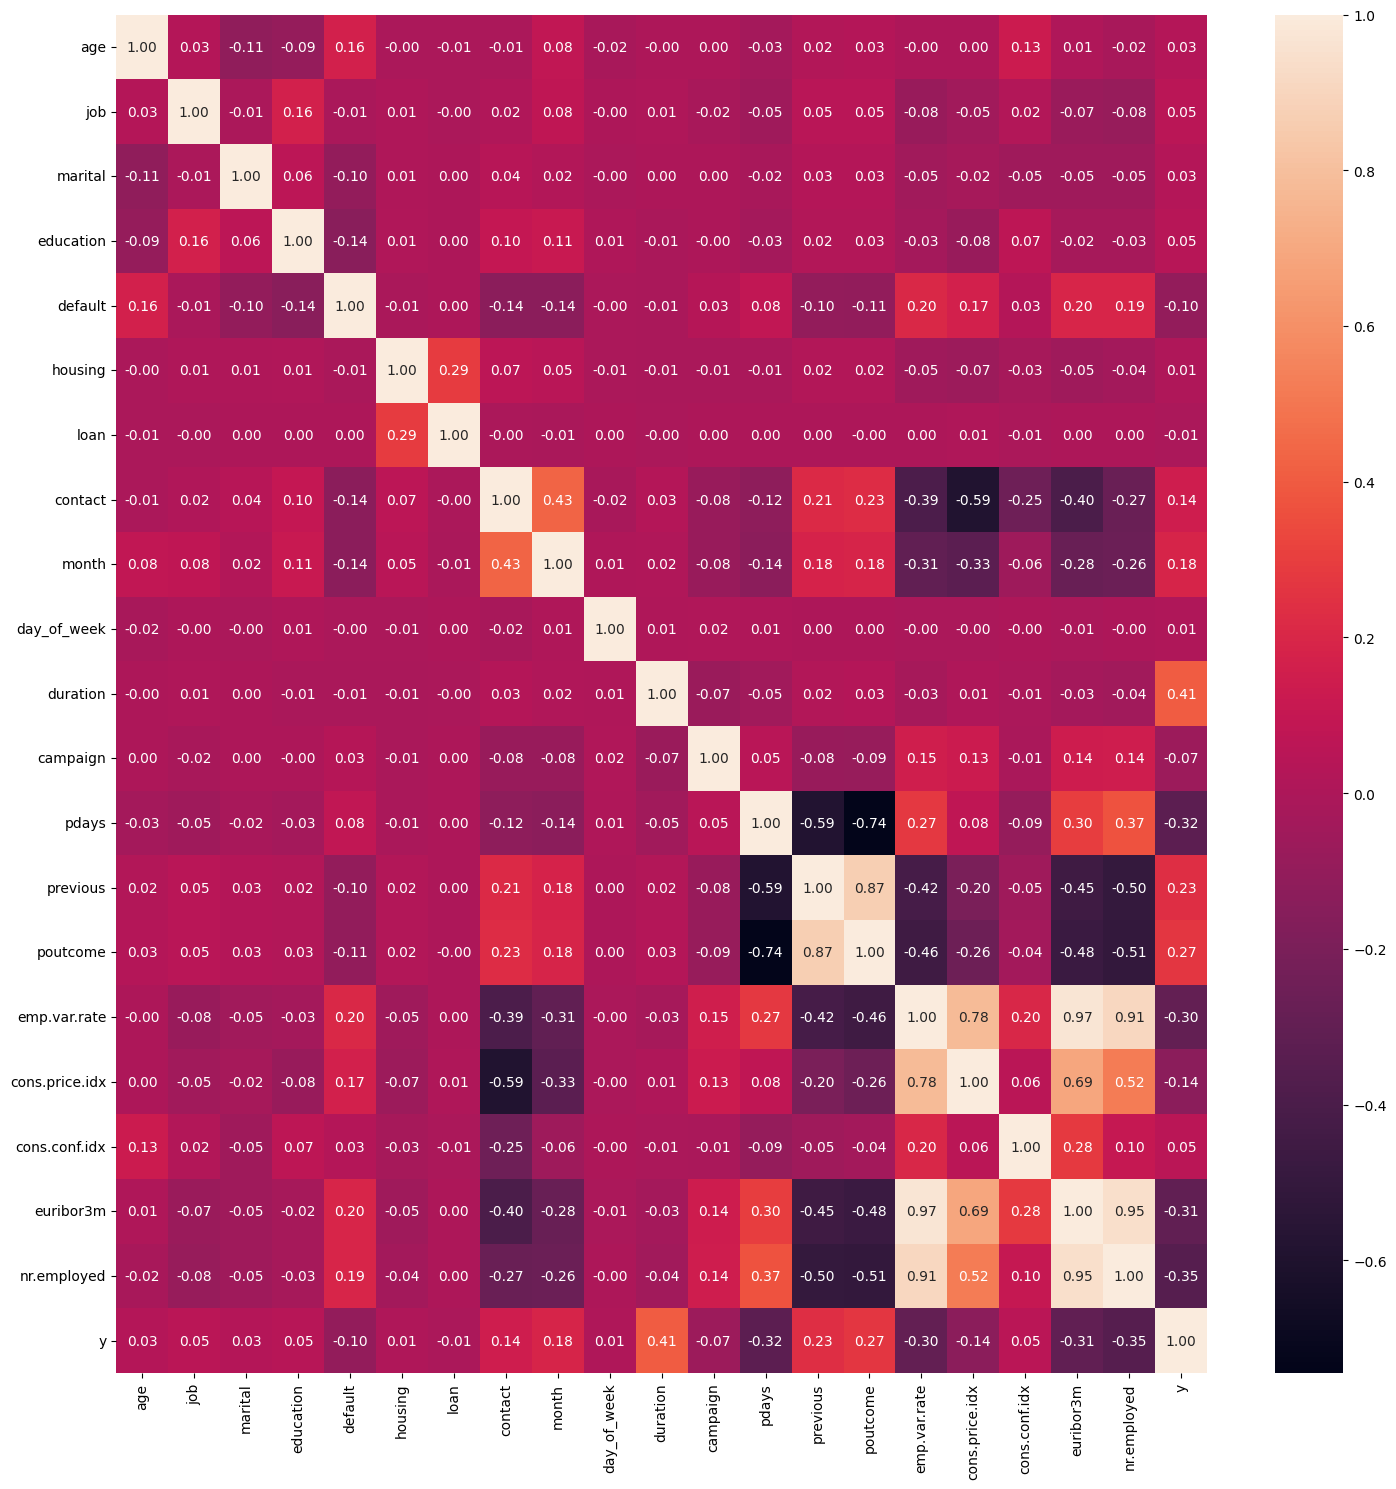

In [38]:
def factorize_data(data_frame : pd.DataFrame, columns : list[str]) -> pd.DataFrame:
    new_df = data_frame
    for col in columns:
        new_df[col] = pd.factorize(df[col])[0]

    return new_df

categoric_variables = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

heatmap_df = factorize_data(df, categoric_variables)
heatmap_df = factorize_data(heatmap_df, ['y'])
fig, axes = plt.subplots(figsize=(15, 15))

sns.heatmap(heatmap_df[heatmap_df.columns].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

In [39]:
df = pd.get_dummies(df, columns=categoric_variables,  drop_first=True)
df = factorize_data(df, ['y'])


print(df.head())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_6  month_7  month_8  \
0          -36.4      4.857       5191.0  ...    False    False    False   
1          -36.4      4.857       5191.0  ...    False    False    False   
2          -36.4      4.857       5191.0  ...    False    False    False   
3          -36.4      4.857       5191.0  ...    False    False    False   
4          -36.4      4.857       5191.0  ...    False    False    False   

   month_9  day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0    F

In [40]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [41]:
# Stats for Campaign
campaign_stats = df["campaign"].describe()
campaign_stats

def outlier_analysis(column : pd.Series) -> None:
    column_stats = column.describe()

    fare_iqr = column_stats["75%"] - column_stats["25%"]
    upper_limit = column_stats["75%"] + 1.5 * fare_iqr
    lower_limit = column_stats["25%"] - 1.5 * fare_iqr

    print(f"The upper and lower limits for finding outliers in {column.name} are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(fare_iqr, 2)}")

outlier_analysis(df['campaign'])

df = df[df["campaign"] < 25]

The upper and lower limits for finding outliers in campaign are 6.0 and -2.0, with an interquartile range of 2.0


In [42]:
df.isnull().sum().sort_values(ascending = False)

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
job_1             0
job_2             0
job_3             0
job_4             0
job_5             0
job_6             0
job_7             0
job_8             0
job_9             0
job_10            0
job_11            0
marital_1         0
marital_2         0
marital_3         0
education_1       0
education_2       0
education_3       0
education_4       0
education_5       0
education_6       0
education_7       0
default_1         0
default_2         0
housing_1         0
housing_2         0
loan_1            0
loan_2            0
contact_1         0
month_1           0
month_2           0
month_3           0
month_4           0
month_5           0
month_6           0
month_7           0
month_8           0
month_9           0
day_of_week_1     0
day_of_week_2     0


In [43]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled["y"] = df["y"]

print(df_scaled)

            age  duration  campaign  pdays  previous  emp.var.rate  \
0      0.481481  0.053070  0.000000    1.0  0.000000      0.937500   
1      0.493827  0.030297  0.000000    1.0  0.000000      0.937500   
2      0.246914  0.045954  0.000000    1.0  0.000000      0.937500   
3      0.283951  0.030704  0.000000    1.0  0.000000      0.937500   
4      0.481481  0.062424  0.000000    1.0  0.000000      0.937500   
...         ...       ...       ...    ...       ...           ...   
41098  0.691358  0.067914  0.000000    1.0  0.000000      0.479167   
41099  0.358025  0.077877  0.000000    1.0  0.000000      0.479167   
41100  0.481481  0.038430  0.043478    1.0  0.000000      0.479167   
41101  0.333333  0.089874  0.000000    1.0  0.000000      0.479167   
41102  0.703704  0.048597  0.086957    1.0  0.142857      0.479167   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_6  \
0            0.698753        0.60251   0.957379     0.859735  ...      0.0   
1  

In [44]:
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples
df_scaled = df_scaled.dropna()
X = df_scaled.drop("y", axis = 1)
y = df_scaled["y"]
print(y.isna().sum())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


0


In [45]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

selection_model = SelectKBest(chi2, k = 10)
print(y_train.isna().sum())
#print(X_train.isna().sum())
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

0


,previous,emp.var.rate,euribor3m,nr.employed,job_11,month_4,month_7,month_9,poutcome_1,poutcome_2
0,0.0,0.6875,0.806393,0.877883,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0000,0.981183,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.9375,0.957153,0.859735,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.9375,0.958059,0.859735,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0000,0.981183,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
X_train_sel["y"] = list(y_train)
X_test_sel["y"] = list(y_test)
X_train_sel.to_csv("data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("data/processed/clean_test.csv", index = False)

In [47]:
train_data = pd.read_csv("data/processed/clean_train.csv")
test_data = pd.read_csv("data/processed/clean_test.csv")

train_data.head()

,previous,emp.var.rate,euribor3m,nr.employed,job_11,month_4,month_7,month_9,poutcome_1,poutcome_2,y
0,0.0,0.6875,0.806393,0.877883,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0000,0.981183,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.9375,0.957153,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.9375,0.958059,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0000,0.981183,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


LOGISTIC REGRESSION MODEL

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

prediction = model.predict(X_test)

accuracy_score(y_test, prediction)

0.8884690394929303

OPTIMIZATION

In [49]:
from sklearn.model_selection import GridSearchCV

#Preventing warnings to show in the terminal(...)
def warn(*args, **kwargs):
    pass
import warnings
#(...)by overriding the function
warnings.warn = warn

hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

model = LogisticRegression(C = grid.best_params_['C'], penalty = grid.best_params_['penalty'], solver = grid.best_params_['solver'])
model.fit(X_train, y_train)

prediction = model.predict(X_test)

accuracy_score(y_test, prediction)

Best hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


0.8887128230131643

After optimization, the model performs 0.0003 better